In [1]:
pip install -U scikit-learn

DEPRECATION: unyt 2.8.0 has a non-standard dependency specifier numpy>="1.13.0". pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of unyt or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install --upgrade joblib

DEPRECATION: unyt 2.8.0 has a non-standard dependency specifier numpy>="1.13.0". pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of unyt or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install tensorflow

DEPRECATION: unyt 2.8.0 has a non-standard dependency specifier numpy>="1.13.0". pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of unyt or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
Note: you may need to restart the kernel to use updated packages.


Import and stuffs

In [4]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt

In [5]:
from sklearn import metrics
from sklearn.model_selection import cross_validate, KFold, cross_val_predict, GridSearchCV

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.neighbors import KNeighborsRegressor

initializing the features and target

In [6]:
import h5py
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np

with h5py.File('/home/jovyan/Data/FOF_Subfind/IllustrisTNG//LH/LH_0/fof_subhalo_tab_013.hdf5', 'r') as hf:
    print (hf['Subhalo'].keys())
    gmetal = hf['Subhalo/SubhaloGasMetallicity'][:]
    sfr = hf['Subhalo/SubhaloSFR'][:]
    mtype = hf['Subhalo/SubhaloMassType'][:]

<KeysViewHDF5 ['SubhaloBHMass', 'SubhaloBHMdot', 'SubhaloBfldDisk', 'SubhaloBfldHalo', 'SubhaloCM', 'SubhaloGasMetalFractions', 'SubhaloGasMetalFractionsHalfRad', 'SubhaloGasMetalFractionsMaxRad', 'SubhaloGasMetalFractionsSfr', 'SubhaloGasMetalFractionsSfrWeighted', 'SubhaloGasMetallicity', 'SubhaloGasMetallicityHalfRad', 'SubhaloGasMetallicityMaxRad', 'SubhaloGasMetallicitySfr', 'SubhaloGasMetallicitySfrWeighted', 'SubhaloGrNr', 'SubhaloHalfmassRad', 'SubhaloHalfmassRadType', 'SubhaloIDMostbound', 'SubhaloLen', 'SubhaloLenType', 'SubhaloMass', 'SubhaloMassInHalfRad', 'SubhaloMassInHalfRadType', 'SubhaloMassInMaxRad', 'SubhaloMassInMaxRadType', 'SubhaloMassInRad', 'SubhaloMassInRadType', 'SubhaloMassType', 'SubhaloParent', 'SubhaloPos', 'SubhaloSFR', 'SubhaloSFRinHalfRad', 'SubhaloSFRinMaxRad', 'SubhaloSFRinRad', 'SubhaloSpin', 'SubhaloStarMetalFractions', 'SubhaloStarMetalFractionsHalfRad', 'SubhaloStarMetalFractionsMaxRad', 'SubhaloStarMetallicity', 'SubhaloStarMetallicityHalfRad', '

In [7]:
gmetal

array([0.01141489, 0.00724728, 0.02172049, ..., 0.        , 0.        ,
       0.        ], dtype=float32)

In [8]:
pdgmetal = pd.DataFrame(gmetal, columns=['Gas Metallicity'])
pdsfr = pd.DataFrame(sfr, columns=['Stellar Formation Rate'])

In [9]:
gmass = mtype[:,0]
dmmass = mtype[:,1]
stmass = mtype[:,4]
bhmass = mtype[:,5]

Converting into the log space for convinence

In [10]:
pdgmass = np.log10((pd.DataFrame(gmass, columns=['Gas Mass']))*(10**10))
pddmmass = np.log10((pd.DataFrame(dmmass, columns=['Dark Matter Mass']))*(10**10))
pdstmass = np.log10((pd.DataFrame(stmass, columns=['Stellar Mass']))*(10**10))
pdbhmass = np.log10((pd.DataFrame(bhmass, columns=['Black Hole Mass']))*(10**10))

**CASE 1: Replacing 0s with 10^-8, inf and NaN with 0s**

In [11]:
pdgmetal.replace(to_replace = 0, value = 10**-8, inplace=True)
pdsfr.replace(to_replace = 0, value = 10**-8, inplace=True)
pdgmass.replace(to_replace = -np.inf, value = 8, inplace=True)
pddmmass.replace(to_replace = -np.inf, value = 8, inplace=True)
pdstmass.replace(to_replace = -np.inf, value = 8, inplace=True)
pdbhmass.replace(to_replace = -np.inf, value = 8, inplace=True) 

pdgmetal.fillna(0,inplace=True)
pdsfr.fillna(0,inplace=True)
pdgmass.fillna(0,inplace=True)
pddmmass.fillna(0,inplace=True)
pdstmass.fillna(0,inplace=True)
pdbhmass.fillna(0,inplace=True)

In [12]:
pdgmass

,Gas Mass
0,12.045054
1,11.855746
2,11.498063
3,11.114077
4,10.603581
...,...
20911,8.000000
20912,8.000000
20913,8.000000
20914,8.000000


In [13]:
features = pd.concat([pdgmetal, pdsfr, pdgmass, pdstmass, pdbhmass], axis=1)
target = pddmmass
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

In [14]:
x_train

,Gas Metallicity,Stellar Formation Rate,Gas Mass,Stellar Mass,Black Hole Mass
11032,1.000000e-08,1.000000e-08,8.000000,8.000000,8.000000
14483,1.000000e-08,1.000000e-08,7.636191,8.000000,8.000000
15009,1.000000e-08,1.000000e-08,7.791211,8.000000,8.000000
10264,1.000000e-08,1.000000e-08,8.781537,8.000000,8.000000
11511,1.000000e-08,1.000000e-08,8.336498,8.000000,8.000000
...,...,...,...,...,...
16565,1.000000e-08,1.000000e-08,7.425968,8.000000,8.000000
976,1.000000e-08,7.666773e-02,9.037294,8.000000,8.000000
1645,1.028072e-03,5.054553e-01,10.636576,8.527561,7.031012
8587,1.000000e-08,1.000000e-08,8.887984,8.000000,8.000000


Case 1a : **Decision Tree** Model

prediction :  [ 9.543418    9.51761074 10.7277818  ...  9.93121839  9.71950928
  9.58328952]
R2 Score :  0.7983620231804475
The mean square value :  0.04728098478765922
The Score :  {'fit_time': array([0.04906726, 0.04470015, 0.04671955, 0.0466671 , 0.04527497,
       0.04414773, 0.0453167 ]), 'score_time': array([0.00571656, 0.00451422, 0.00530863, 0.00483513, 0.00422454,
       0.00392461, 0.00457811]), 'test_score': array([0.78112818, 0.7725903 , 0.76637866, 0.77175035, 0.76580381,
       0.78605637, 0.77447299]), 'train_score': array([0.97274826, 0.97205662, 0.97215798, 0.97261221, 0.97372137,
       0.97245225, 0.97220113])}
Test Score :  0.7740258056180741
Train Score :  0.972564258205788
Cross Vaidate prediction :  [12.84666391 12.86503237 12.56594156 ...  9.30413826  9.30629202
  9.30459477]
Pearson Correlation Coefficient: [0.884204107791874]
P-value: 0.0


Text(0, 0.5, 'Predicted Dark Matter Mass by Decision Tree Regressor')

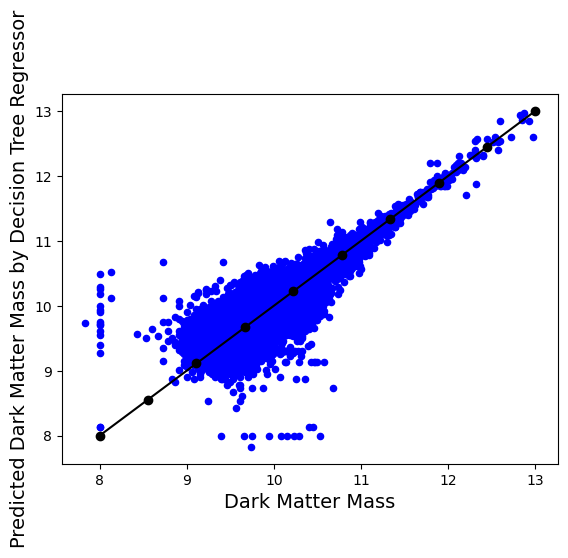

In [15]:
regressor = DecisionTreeRegressor()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
print ("prediction : ", y_pred)

r = r2_score(y_test, y_pred)
print ("R2 Score : ", r)

mse = mean_squared_error(y_test, y_pred)
print ("The mean square value : ", mse)

scores = cross_validate(regressor,features,target, cv = KFold(n_splits=7, shuffle=True, random_state=10), return_train_score=True)
s = np.mean(scores['test_score'])
print ("The Score : ", scores)
print ("Test Score : ", s)
print ("Train Score : ", np.mean(scores['train_score']))

cvpred = cross_val_predict(regressor,features,target, cv = KFold(n_splits=7, shuffle=True, random_state=10))
print ("Cross Vaidate prediction : ", cvpred)

c_coeff, p_value = stats.pearsonr(cvpred, target)
print("Pearson Correlation Coefficient:", c_coeff)
print("P-value:", p_value)

m = np.linspace(8, 13, 10)
n = m
plt.plot(m, n, color='black', linestyle='-', marker='o')
plt.scatter(target,cvpred, s = 20, c = 'blue')
plt.xlabel('Dark Matter Mass', fontsize=14)
plt.ylabel('Predicted Dark Matter Mass by Decision Tree Regressor',fontsize=14)

Case 1b : **knn** Model

prediction :  [[ 9.46870276]
 [ 9.41685494]
 [11.08638948]
 ...
 [10.03540176]
 [ 9.61279295]
 [ 9.65436781]]
R2 Score :  0.8576603655913592
The mean square value :  0.03337644126026228
The Score :  {'fit_time': array([0.01764774, 0.01693201, 0.01697779, 0.0173471 , 0.01562119]), 'score_time': array([0.12441444, 0.12280607, 0.12141323, 0.1248343 , 0.11653209]), 'test_score': array([0.48600709, 0.48075554, 0.45985659, 0.65896894, 0.65418799]), 'train_score': array([0.52682423, 0.54778262, 0.49917581, 0.71744665, 0.70820005])}
Test Score :  0.5479552281371614
Train Score :  0.5998858714878862
Cross Vaidate prediction :  [[12.37031114]
 [12.06707669]
 [11.58627538]
 ...
 [ 9.91944285]
 [ 9.88439612]
 [ 9.72842426]]
Pearson Correlation Coefficient: [0.7884114101113657]
P-value: 0.0


Text(0, 0.5, 'Predicted Dark Matter Mass by KNN Regressor model')

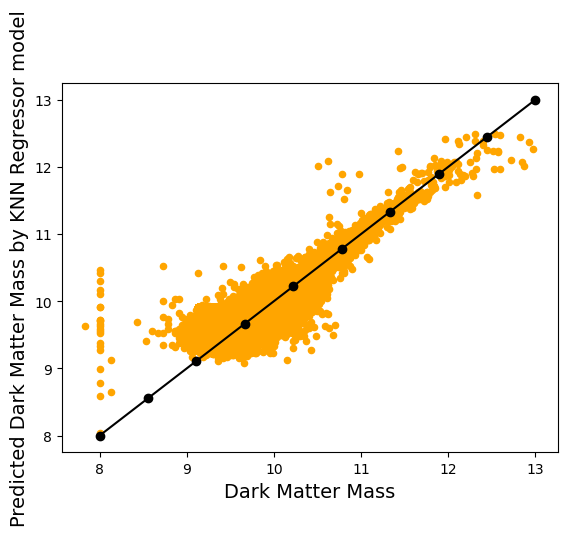

In [16]:
knnregressor = KNeighborsRegressor(n_neighbors=4)
knnregressor.fit(x_train, y_train)
ky_pred = knnregressor.predict(x_test)
print ("prediction : ", ky_pred)

kr = r2_score(y_test, ky_pred)
print ("R2 Score : ", kr)

kmse = mean_squared_error(y_test, ky_pred)
print ("The mean square value : ", kmse)

kscores = cross_validate(knnregressor,features,target, cv = KFold(n_splits=5, shuffle=True, random_state=10), return_train_score=True)
ks = np.mean(kscores['test_score'])
print ("The Score : ", kscores)
print ("Test Score : ", ks)
print ("Train Score : ", np.mean(kscores['train_score']))

kcvpred = cross_val_predict(knnregressor,features,target, cv = KFold(n_splits=5, shuffle=True, random_state=10))
print ("Cross Vaidate prediction : ", kcvpred)

kc_coeff, kp_value = stats.pearsonr(kcvpred.reshape((20916,)), target)
print("Pearson Correlation Coefficient:", kc_coeff)
print("P-value:", kp_value)

m = np.linspace(8, 13, 10)
n = m
plt.plot(m, n, color='black', linestyle='-', marker='o')

plt.scatter(target,kcvpred, s = 20, c = 'orange')
plt.xlabel('Dark Matter Mass', fontsize=14)
plt.ylabel('Predicted Dark Matter Mass by KNN Regressor model',fontsize=14)

Case 1c : **Linear** Model

prediction :  [[ 9.66257417]
 [ 9.52400437]
 [10.89424879]
 ...
 [ 9.90462139]
 [ 9.68990045]
 [ 9.77858444]]
R2 Score :  0.7632373584500198
The mean square value :  0.05551717503805625
The Score :  {'fit_time': array([0.00632787, 0.09834814, 0.09861135, 0.00602889, 0.20022607]), 'score_time': array([0.1869998 , 0.20113969, 0.20113087, 0.00452852, 0.00416684]), 'test_score': array([0.73494936, 0.74311948, 0.73126845, 0.74440485, 0.72990133]), 'train_score': array([0.73963147, 0.73750311, 0.73923707, 0.73720437, 0.74078053])}
Test Score :  0.7367286953317292
Train Score :  0.738871310304933
Cross Vaidate prediction :  [[11.21864555]
 [10.71843649]
 [11.92788803]
 ...
 [ 9.45360224]
 [ 9.45356352]
 [ 9.45239099]]
Pearson Correlation Coefficient: [0.8582830405787744]
P-value: 0.0


Text(0, 0.5, 'Predicted Dark Matter Mass by Linear Regression model')

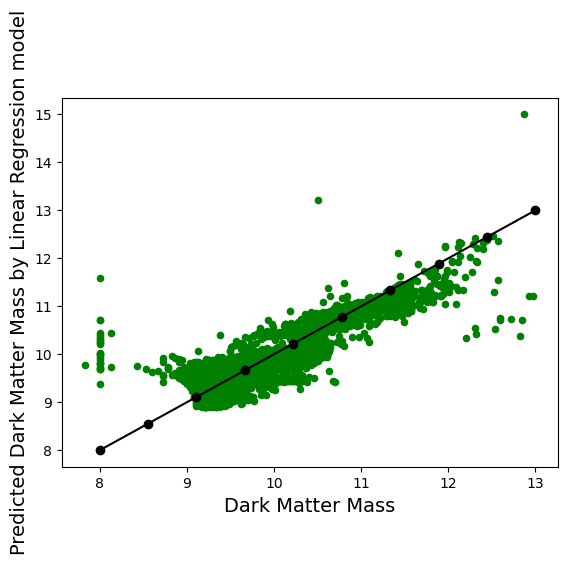

In [17]:
linregressor = LinearRegression()
linregressor.fit(x_train, y_train)
ly_pred = linregressor.predict(x_test)
print ("prediction : ", ly_pred)

lr = r2_score(y_test, ly_pred)
print ("R2 Score : ", lr)

lmse = mean_squared_error(y_test, ly_pred)
print ("The mean square value : ", lmse)

lscores = cross_validate(linregressor,features,target, cv = KFold(n_splits=5, shuffle=True, random_state=10), return_train_score=True)
ls = np.mean(lscores['test_score'])
print ("The Score : ", lscores)
print ("Test Score : ", ls)
print ("Train Score : ", np.mean(lscores['train_score']))

lcvpred = cross_val_predict(linregressor,features,target, cv = KFold(n_splits=5, shuffle=True, random_state=10))
print ("Cross Vaidate prediction : ", lcvpred)

m = np.linspace(8, 13, 10)
n = m
plt.plot(m, n, color='black', linestyle='-', marker='o')

lc_coeff, lp_value = stats.pearsonr(lcvpred.reshape((20916,)), target)
print("Pearson Correlation Coefficient:", lc_coeff)
print("P-value:", lp_value)

plt.scatter(target,lcvpred, s = 20, c = 'green')
plt.xlabel('Dark Matter Mass', fontsize=14)
plt.ylabel('Predicted Dark Matter Mass by Linear Regression model',fontsize=14)

Case 1d : **Random Forest** Model

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


prediction :  [ 9.50937471  9.51437035 11.07322958 ...  9.94953555  9.68549289
  9.64061211]
R2 Score :  0.8510677325188298
The mean square value :  0.03492231168075269


/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: Dat

The Score :  {'fit_time': array([2.38477778, 2.28823662, 2.2891345 , 2.30241489, 2.34991598]), 'score_time': array([0.11590123, 0.12179923, 0.11694002, 0.12384701, 0.12300801]), 'test_score': array([0.83685254, 0.83743545, 0.83042832, 0.83706221, 0.83115718]), 'train_score': array([0.95352438, 0.95267486, 0.95336919, 0.95423622, 0.95342524])}
Test Score :  0.8345871403332282
Train Score :  0.9534459767998484


/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:1044: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:1044: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:1044: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:1044:

Cross Vaidate prediction :  [12.88866333 12.80918401 12.52294016 ...  9.30428215  9.30676783
  9.30524408]
Pearson Correlation Coefficient: [0.9143608798008189]
P-value: 0.0


Text(0, 0.5, 'Predicted Dark Matter Mass by Random Forrest Regression model')

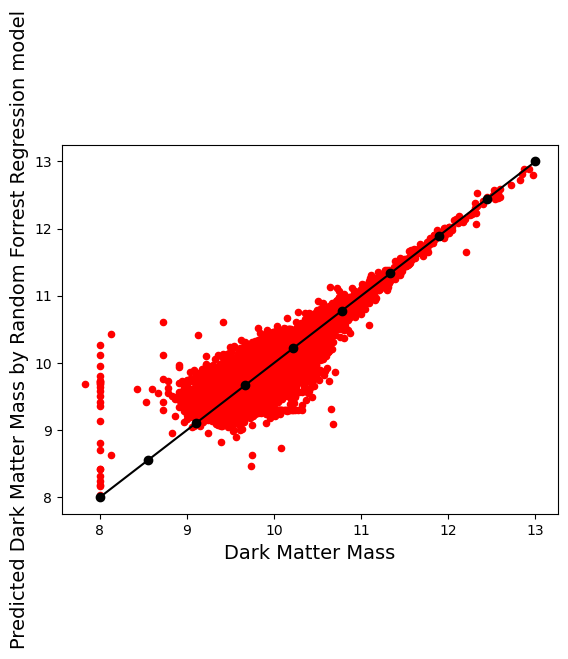

In [18]:
foregressor = RandomForestRegressor()
foregressor.fit(x_train, y_train)
foy_pred = foregressor.predict(x_test)
print ("prediction : ", foy_pred)

fr = r2_score(y_test, foy_pred)
print ("R2 Score : ", fr)

fmse = mean_squared_error(y_test, foy_pred)
print ("The mean square value : ", fmse)

fscores = cross_validate(foregressor,features,target, cv = KFold(n_splits=5, shuffle=True, random_state=10), return_train_score=True)
fs = np.mean(fscores['test_score'])
print ("The Score : ", fscores)
print ("Test Score : ", fs)
print ("Train Score : ", np.mean(fscores['train_score']))

fcvpred = cross_val_predict(foregressor,features,target, cv = KFold(n_splits=5, shuffle=True, random_state=10))
print ("Cross Vaidate prediction : ", fcvpred)

fc_coeff, fp_value = stats.pearsonr(fcvpred.reshape((20916,)), target)
print("Pearson Correlation Coefficient:", fc_coeff)
print("P-value:", fp_value)

m = np.linspace(8, 13, 10)
n = m
plt.plot(m, n, color='black', linestyle='-', marker='o')

plt.scatter(target,fcvpred, s = 20, c = 'red')
plt.xlabel('Dark Matter Mass', fontsize=14)
plt.ylabel('Predicted Dark Matter Mass by Random Forrest Regression model',fontsize=14)

Case 1e : **Extra Trees Forest** Model

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


prediction :  [ 9.4796175   9.49922085 11.07532531 ...  9.89885219  9.70541031
  9.61169766]
R2 Score :  0.8366985948358656
The mean square value :  0.03829165207444254


/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: Dat

The Score :  {'fit_time': array([1.52307129, 1.56944561, 1.6807971 , 1.59476447, 1.58686066]), 'score_time': array([0.14948726, 0.15108585, 0.1648016 , 0.15330172, 0.1627605 ]), 'test_score': array([0.82182192, 0.82229074, 0.81338739, 0.82326642, 0.82037881]), 'train_score': array([0.97251587, 0.97202317, 0.97225907, 0.97404205, 0.97204978])}
Test Score :  0.820229056606627
Train Score :  0.9725779880438052


/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:1044: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:1044: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:1044: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:1044:

Cross Vaidate prediction :  [12.89758504 12.84698984 12.44512987 ...  9.3042012   9.30655569
  9.30526357]
Pearson Correlation Coefficient: [0.9071743942372295]
P-value: 0.0


Text(0, 0.5, 'Predicted Dark Matter Mass by Extra Randomized forest')

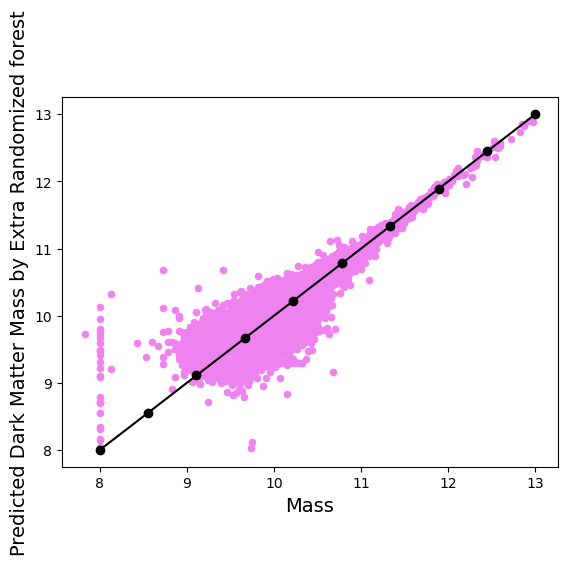

In [19]:
from sklearn.ensemble import ExtraTreesRegressor
etregressor = ExtraTreesRegressor(n_estimators=100, random_state=33)
etregressor.fit(x_train, y_train)

ety_pred = etregressor.predict(x_test)
print ("prediction : ", ety_pred)

etr = r2_score(y_test, ety_pred)
print ("R2 Score : ", etr)

etmse = mean_squared_error(y_test, ety_pred)
print ("The mean square value : ", etmse)

etscores = cross_validate(etregressor,features,target, cv = KFold(n_splits=5, shuffle=True, random_state=10), return_train_score=True)
ets = np.mean(etscores['test_score'])
print ("The Score : ", etscores)
print ("Test Score : ", ets)
print ("Train Score : ", np.mean(etscores['train_score']))

etcvpred = cross_val_predict(etregressor,features,target, cv = KFold(n_splits=5, shuffle=True, random_state=10))
print ("Cross Vaidate prediction : ", etcvpred)

etc_coeff, etp_value = stats.pearsonr(etcvpred.reshape((20916,)), target)
print("Pearson Correlation Coefficient:", etc_coeff)
print("P-value:", etp_value)

m = np.linspace(8, 13, 10)
n = m
plt.plot(m, n, color='black', linestyle='-', marker='o')

plt.scatter(target,etcvpred, s = 20, c = 'violet')
plt.xlabel('Mass', fontsize=14)
plt.ylabel('Predicted Dark Matter Mass by Extra Randomized forest',fontsize=14)

Case 1f : **Neural Network** Model

2023-07-31 19:47:12.100259: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-07-31 19:47:12.100402: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-07-31 19:47:13.378231: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-07-31 19:47:13.378467: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-07-31 19:47:13.378487: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT War

Epoch 1/50
523/523 [==============================] - 2s 3ms/step - loss: 2.3668 - val_loss: 0.0590
Epoch 2/50
523/523 [==============================] - 1s 2ms/step - loss: 0.0710 - val_loss: 0.0420
Epoch 3/50
523/523 [==============================] - 1s 2ms/step - loss: 0.0535 - val_loss: 0.0354
Epoch 4/50
523/523 [==============================] - 1s 2ms/step - loss: 0.0509 - val_loss: 0.0415
Epoch 5/50
523/523 [==============================] - 1s 3ms/step - loss: 0.0509 - val_loss: 0.0384
Epoch 6/50
523/523 [==============================] - 1s 3ms/step - loss: 0.0393 - val_loss: 0.0319
Epoch 7/50
523/523 [==============================] - 1s 2ms/step - loss: 0.0372 - val_loss: 0.0306
Epoch 8/50
523/523 [==============================] - 1s 2ms/step - loss: 0.0390 - val_loss: 0.0306
Epoch 9/50
523/523 [==============================] - 1s 2ms/step - loss: 0.0471 - val_loss: 0.0318
Epoch 10/50
523/523 [==============================] - 1s 2ms/step - loss: 0.0401 - val_loss: 0.0376

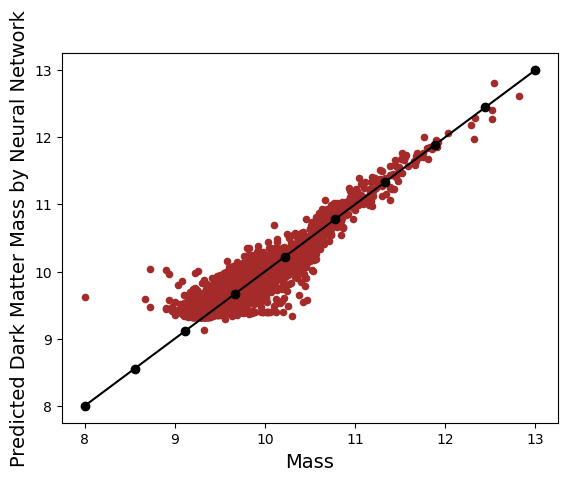

In [20]:
from tensorflow import keras
from tensorflow.keras import layers

nnmodel = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(features.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

nnmodel.compile(optimizer='adam', loss='mean_squared_error')
history = nnmodel.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, batch_size=32)

nny_pred = nnmodel.predict(x_test)
print("Prediction:", nny_pred)

nnr2 = r2_score(y_test, nny_pred)
print("R2 Score:", nnr2)

nnmse = mean_squared_error(y_test, nny_pred)
print("Mean Square Value:", nnmse)

nnc_coeff, nnp_value = stats.pearsonr(nny_pred.reshape((4184,)), y_test)
print("Pearson Correlation Coefficient:", nnc_coeff)
print("P-value:", nnp_value)

plt.scatter(y_test, nny_pred, s=20, c='brown')
plt.xlabel('Mass', fontsize=14)
plt.ylabel('Predicted Dark Matter Mass by Neural Network', fontsize=14)

m = np.linspace(8, 13, 10)
n = m
plt.plot(m, n, color='black', linestyle='-', marker='o')

loss = nnmodel.evaluate(x_test, y_test)
print("Neural Network nnmodel Loss:", loss)


**CASE 2: Removing 0s, inf and NaN**

In [21]:
df = pd.DataFrame(pdgmetal)
df['Stellar Formation Rate'] = pdsfr
df['Gas Mass'] = pdgmass
df['Stellar Mass'] = pdstmass
df['Black Hole Mass'] = pdbhmass
df['Dark Matter Mass'] = pddmmass

In [22]:
df['Gas Metallicity'] = df['Gas Metallicity'][(df['Gas Metallicity'] != 10**-8) & (~np.isinf(df['Gas Metallicity']))]
df['Stellar Formation Rate'] = df['Stellar Formation Rate'][(df['Stellar Formation Rate'] != 10**-8) & (~np.isinf(df['Stellar Formation Rate']))]
df['Gas Mass'] = df['Gas Mass'][(df['Gas Mass'] != 8) & (~np.isinf(df['Gas Mass']))]
df['Stellar Mass'] = df['Stellar Mass'][(df['Stellar Mass'] != 8) & (~np.isinf(df['Stellar Mass']))]
df['Black Hole Mass'] = df['Black Hole Mass'][(df['Black Hole Mass'] != 8) & (~np.isinf(df['Black Hole Mass']))]
df['Dark Matter Mass'] = df['Dark Matter Mass'][(df['Dark Matter Mass'] != 8) & (~np.isinf(df['Dark Matter Mass']))]

In [23]:
df

,Gas Metallicity,Stellar Formation Rate,Gas Mass,Stellar Mass,Black Hole Mass,Dark Matter Mass
0,0.011415,8.925939,12.045054,11.086385,8.708256,12.927961
1,0.007247,11.345034,11.855746,11.258096,9.029478,12.846664
2,0.021720,28.580515,11.498063,10.827762,8.387722,12.324178
3,0.010562,27.316439,11.114077,10.208197,7.768608,11.838054
4,0.020574,61.910538,10.603581,10.662308,8.353778,11.424781
...,...,...,...,...,...,...
20911,NaN,NaN,NaN,NaN,NaN,9.149634
20912,NaN,NaN,NaN,NaN,NaN,9.258778
20913,NaN,NaN,NaN,NaN,NaN,9.242388
20914,NaN,NaN,NaN,NaN,NaN,9.169837


In [24]:
ddf = df.dropna()

In [25]:
Features = ddf[['Gas Metallicity', 'Stellar Formation Rate', 'Gas Mass', 'Stellar Mass', 'Black Hole Mass']]
Target = ddf['Dark Matter Mass']
X_train, X_test, Y_train, Y_test = train_test_split(Features, Target, test_size=0.1)

In [26]:
X_train.shape

(680, 5)

Case 2a : **Decision Tree** Model

prediction :  [11.69781856 10.80878019 11.1504604  11.10318658 10.96760835 10.76292192
 10.75632236 11.43358099 10.69251863 11.17959717 11.93625021 12.13990939
 10.80238667 11.11833923 11.8242327  10.73321054 10.59457055 10.35504459
 10.9554907  12.31306512 10.96413523 11.10341666 11.10295637 10.72613985
 10.78069102 11.76847864 12.86503237 12.1677398  10.62468222 10.76443076
 11.38576318 10.62468222 10.86444254 10.62881839 10.79543039 10.86920198
 11.49654553 10.74492019 10.84901739 11.28302077 11.60418847 11.52699228
 10.96760835 10.87195444 10.92709529 10.79961751 10.73321054 11.38275101
 11.32861092 11.20344386 10.87234621 10.9554907  10.90441901 10.83813853
 10.35504459 10.75221065 10.96729376 11.41892449 11.29100906 11.0454247
 10.85107858 10.62468222 11.31299413 10.47577469 11.00437363 10.4423119
 10.69251863 11.8736366  10.89634228 10.99057606 11.18267457 11.9012063
 11.46918614 10.7018965  10.90695768 10.57946311]
R2 Score :  0.9107160379466483
The mean square value :  0.02003

Text(0, 0.5, 'Predicted Dark Matter Mass by Decision Tree Regressor')

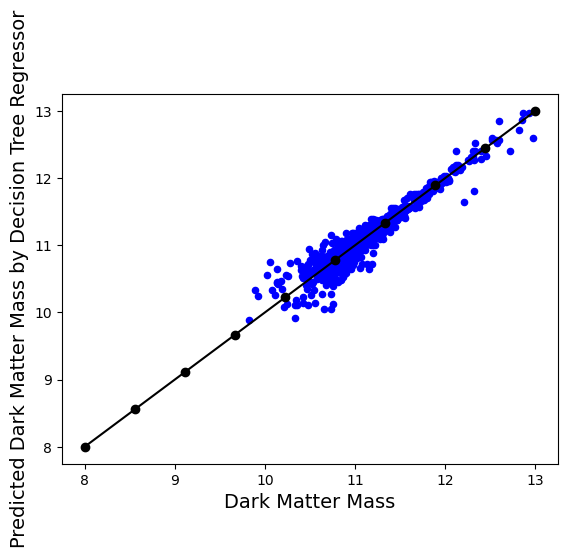

In [27]:
Regressor = DecisionTreeRegressor()
Regressor.fit(X_train, Y_train)
Y_pred = Regressor.predict(X_test)
print ("prediction : ", Y_pred)

R = r2_score(Y_test, Y_pred)
print ("R2 Score : ", R)

Mse = mean_squared_error(Y_test, Y_pred)
print ("The mean square value : ", Mse)

Scores = cross_validate(Regressor,Features,Target, cv = KFold(n_splits=7, shuffle=True, random_state=10), return_train_score=True)
S = np.mean(Scores['test_score'])
print ("The Score : ", Scores)
print ("Test Score : ", S)
print ("Train Score : ", np.mean(Scores['train_score']))

Cvpred = cross_val_predict(Regressor,Features,Target, cv = KFold(n_splits=7, shuffle=True, random_state=10))
print ("Cross Vaidate prediction : ", Cvpred)

C_coeff, P_value = stats.pearsonr(Cvpred.reshape((756,)), Target)
print("Pearson Correlation Coefficient:", C_coeff)
print("P-value:", P_value)

m = np.linspace(8, 13, 10)
n = m
plt.plot(m, n, color='black', linestyle='-', marker='o')

plt.scatter(Target,Cvpred, s = 20, c = 'blue')
plt.xlabel('Dark Matter Mass', fontsize=14)
plt.ylabel('Predicted Dark Matter Mass by Decision Tree Regressor',fontsize=14)

Case 2b : **KNN** Model

prediction :  [11.66119508 10.81470668 11.13638702 11.08682557 10.97010924 10.80669993
 10.82391706 11.32289825 10.71461079 11.22637863 11.97735775 12.0433549
 10.80327756 11.17652776 11.75175029 10.78899808 10.6167068  10.68849967
 10.6746723  12.4823434  10.90733825 11.07903448 11.26933547 10.56711406
 10.85657813 11.90391464 12.10392541 12.03670112 10.67660368 10.79012007
 11.41850244 10.72545308 11.05497235 10.64776177 10.7790805  10.61275751
 11.44289683 10.81470668 10.84164579 11.21935219 11.39317376 11.53912393
 10.81398609 10.82905842 11.05059696 10.74846893 10.71020946 11.43660495
 11.27918234 11.31331583 10.85762335 10.79853845 10.92615101 10.82120209
 10.81586658 10.93767337 10.98746902 11.50617971 11.40290793 11.15222088
 10.84837418 10.72545308 11.14427091 10.79313098 10.98169551 10.2882535
 10.68185274 12.06601842 10.73265517 10.91847702 11.05219441 11.75995998
 11.46132168 10.79853845 10.87996584 10.7698136 ]
R2 Score :  0.9170829714561235
The mean square value :  0.0186

Text(0, 0.5, 'Predicted Dark Matter Mass by KNN Regressor')

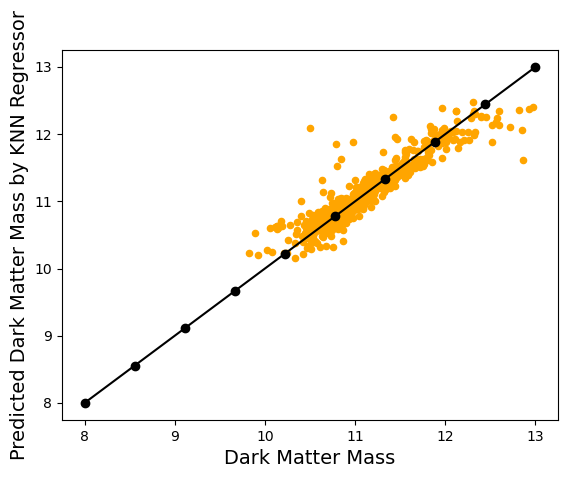

In [28]:
KnnRegressor = KNeighborsRegressor(n_neighbors=4)
KnnRegressor.fit(X_train, Y_train)
KY_pred = KnnRegressor.predict(X_test)
print ("prediction : ", KY_pred)

KR = r2_score(Y_test, KY_pred)
print ("R2 Score : ", KR)

KMse = mean_squared_error(Y_test, KY_pred)
print ("The mean square value : ", KMse)

KScores = cross_validate(KnnRegressor,Features,Target, cv = KFold(n_splits=7, shuffle=True, random_state=10), return_train_score=True)
KS = np.mean(KScores['test_score'])
print ("The Score : ", KScores)
print ("Test Score : ", KS)
print ("Train Score : ", np.mean(KScores['train_score']))

KCvpred = cross_val_predict(KnnRegressor,Features,Target, cv = KFold(n_splits=7, shuffle=True, random_state=10))
print ("Cross Vaidate prediction : ", KCvpred)

KC_coeff, KP_value = stats.pearsonr(KCvpred.reshape((756,)), Target)
print("Pearson Correlation Coefficient:", KC_coeff)
print("P-value:", KP_value)

m = np.linspace(8, 13, 10)
n = m
plt.plot(m, n, color='black', linestyle='-', marker='o')

plt.scatter(Target,KCvpred, s = 20, c = 'orange')
plt.xlabel('Dark Matter Mass', fontsize=14)
plt.ylabel('Predicted Dark Matter Mass by KNN Regressor',fontsize=14)

Case 2c : **Linear** Model

prediction :  [11.74717371 10.66680849 11.04985822 11.14208463 10.94804791 10.77435049
 10.70182965 11.38344401 10.66678431 11.21695124 11.96922969 12.02224268
 10.88366751 11.23836322 11.85515297 10.6158434  10.59000991 10.62182972
 10.68407258 11.96714387 10.90108268 11.00185068 11.25190786 10.42488266
 10.77913304 11.84927104 12.52667665 12.11858966 10.64354746 10.84716448
 11.45670149 10.67543893 10.85485547 10.60441518 10.83776449 10.53574869
 11.53472265 10.68812807 10.79581076 11.18909766 11.56873521 11.63868734
 10.91328511 10.85225595 10.99386947 10.65000198 10.67282949 11.4264089
 11.31630616 11.20136973 10.8210199  10.71902632 10.84754568 10.69181584
 10.6519587  10.93629979 10.93857203 11.39845974 11.22715626 11.16411558
 10.80482634 10.66015903 11.23059709 10.66351741 10.96802359 10.30444978
 10.67477617 11.7919227  10.64741393 10.88799146 11.11723155 11.92903799
 11.51722831 10.69521683 10.84852605 10.66784837]
R2 Score :  0.9402617880523059
The mean square value :  0.013

Text(0, 0.5, 'Predicted Dark Matter Mass by Linear Regressor')

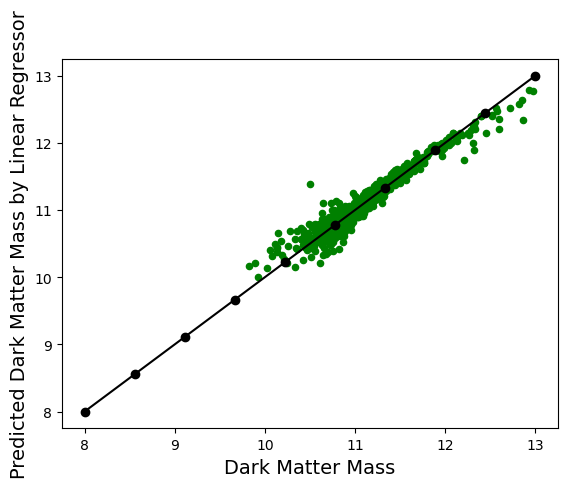

In [29]:
LRegressor = LinearRegression()
LRegressor.fit(X_train, Y_train)
LY_pred = LRegressor.predict(X_test)
print ("prediction : ", LY_pred)

LR = r2_score(Y_test, LY_pred)
print ("R2 Score : ", LR)

LMse = mean_squared_error(Y_test, LY_pred)
print ("The mean square value : ", LMse)

LScores = cross_validate(LRegressor,Features,Target, cv = KFold(n_splits=7, shuffle=True, random_state=10), return_train_score=True)
LS = np.mean(LScores['test_score'])
print ("The Score : ", LScores)
print ("Test Score : ", LS)
print ("Train Score : ", np.mean(LScores['train_score']))

LCvpred = cross_val_predict(LRegressor,Features,Target, cv = KFold(n_splits=7, shuffle=True, random_state=10))
print ("Cross Vaidate prediction : ", LCvpred)

LC_coeff, LP_value = stats.pearsonr(LCvpred.reshape((756,)), Target)
print("Pearson Correlation Coefficient:", LC_coeff)
print("P-value:", LP_value)

m = np.linspace(8, 13, 10)
n = m
plt.plot(m, n, color='black', linestyle='-', marker='o')

plt.scatter(Target,LCvpred, s = 20, c = 'green')
plt.xlabel('Dark Matter Mass', fontsize=14)
plt.ylabel('Predicted Dark Matter Mass by Linear Regressor',fontsize=14)

Case 2d : **Random Forest** Model

prediction :  [11.70691092 10.72582516 11.11358523 11.12648436 10.90028219 10.77468686
 10.79210705 11.32932446 10.64439241 11.20616066 11.94638592 12.12089381
 10.82969919 11.19593341 11.81567956 10.5547319  10.59175141 10.71896897
 10.72535477 12.23189457 10.91905924 11.02927971 11.21925454 10.58106767
 10.77399698 11.80271699 12.62393451 12.13653368 10.6359433  10.73047846
 11.35026665 10.71947148 10.91015274 10.59569672 10.80294506 10.63448261
 11.42264176 10.77983293 10.86647248 11.21873802 11.5771939  11.54484886
 10.91665711 10.77544426 10.92985087 10.74013477 10.66063821 11.39887366
 11.3300678  11.09223702 10.85673011 10.83044425 10.86442829 10.7880992
 10.70733404 10.92170237 10.97050963 11.39999822 11.10688843 11.14365033
 10.81136794 10.65174984 11.21630533 10.69513264 11.02887277 10.42852439
 10.66823075 11.91160217 10.7135435  10.88846336 11.13982646 11.91158052
 11.44813195 10.75765645 10.87823196 10.73212509]
R2 Score :  0.9636815665360193
The mean square value :  0.008

Text(0, 0.5, 'Predicted Dark Matter Mass by Random Forest Regressor')

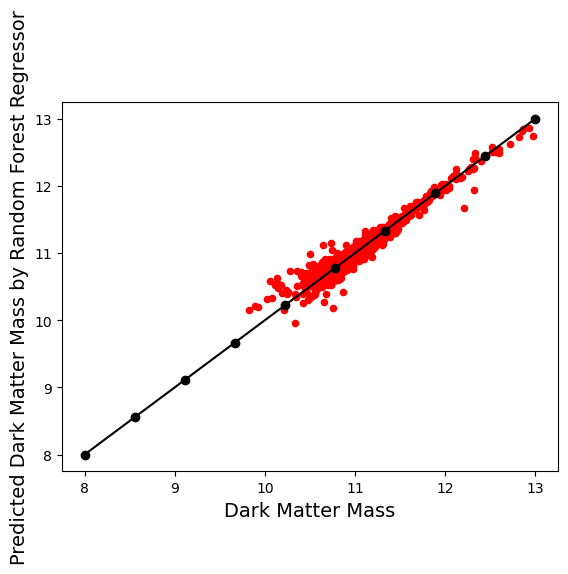

In [30]:
FORegressor = RandomForestRegressor()
FORegressor.fit(X_train, Y_train)
FOY_pred = FORegressor.predict(X_test)
print ("prediction : ", FOY_pred)

FOR = r2_score(Y_test, FOY_pred)
print ("R2 Score : ", FOR)

FOMse = mean_squared_error(Y_test, FOY_pred)
print ("The mean square value : ", FOMse)

FOScores = cross_validate(FORegressor,Features,Target, cv = KFold(n_splits=7, shuffle=True, random_state=10), return_train_score=True)
FOS = np.mean(FOScores['test_score'])
print ("The Score : ", FOScores)
print ("Test Score : ", FOS)
print ("Train Score : ", np.mean(FOScores['train_score']))

FOCvpred = cross_val_predict(FORegressor,Features,Target, cv = KFold(n_splits=7, shuffle=True, random_state=10))
print ("Cross Vaidate prediction : ", FOCvpred)

FC_coeff, FP_value = stats.pearsonr(FOCvpred.reshape((756,)), Target)
print("Pearson Correlation Coefficient:", FC_coeff)
print("P-value:", FP_value)

m = np.linspace(8, 13, 10)
n = m
plt.plot(m, n, color='black', linestyle='-', marker='o')

plt.scatter(Target,FOCvpred, s = 20, c = 'red')
plt.xlabel('Dark Matter Mass', fontsize=14)
plt.ylabel('Predicted Dark Matter Mass by Random Forest Regressor',fontsize=14)

Case 2e : **Extra Random Trees** Model

prediction :  [11.70789551 10.75315274 11.08058399 11.11013719 10.93839361 10.7775509
 10.77455448 11.342118   10.63728928 11.23202263 11.97055028 12.08167619
 10.8451773  11.18510879 11.81231746 10.59703262 10.61250242 10.66609238
 10.73904465 12.25260903 10.9470461  11.00500747 11.21632688 10.6006294
 10.827572   11.82999442 12.62142273 12.11988981 10.66753972 10.71459006
 11.36290963 10.76067495 10.95895745 10.62156108 10.79037517 10.59549401
 11.42667716 10.78742376 10.85626583 11.22079667 11.48398278 11.55540664
 10.95793903 10.76929214 10.86768833 10.75875291 10.6925114  11.39075357
 11.31372604 11.04356754 10.83108838 10.83855648 10.86110363 10.77864089
 10.65360307 10.87597829 10.96783623 11.39444426 11.12756329 11.15325012
 10.82860007 10.64605    11.2331333  10.69832647 11.03522252 10.41771298
 10.63738389 11.90568887 10.66192668 10.92520856 11.12908277 11.91640597
 11.44108851 10.73844371 10.89032541 10.75873001]
R2 Score :  0.9606126440481596
The mean square value :  0.0088

Text(0, 0.5, 'Predicted Dark Matter Mass by Extreme Random Forest Regressor')

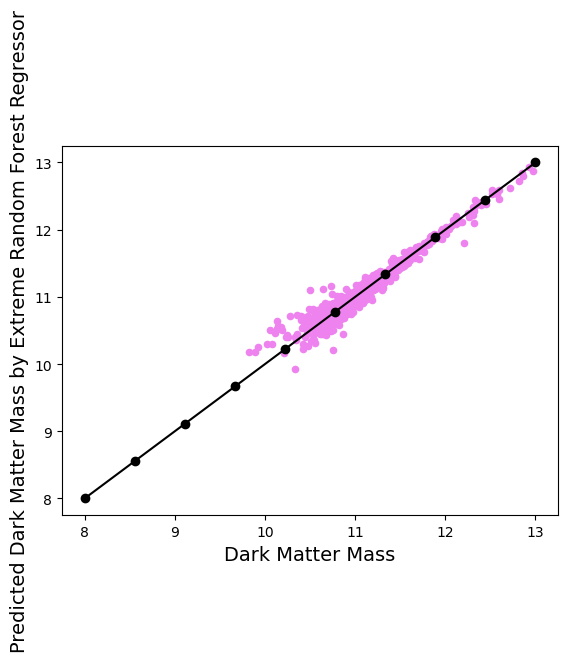

In [31]:
ETRegressor = ExtraTreesRegressor(n_estimators=100, random_state=33)
ETRegressor.fit(X_train, Y_train)
ETY_pred = ETRegressor.predict(X_test)
print ("prediction : ", ETY_pred)

ETR = r2_score(Y_test, ETY_pred)
print ("R2 Score : ", ETR)

ETMse = mean_squared_error(Y_test, ETY_pred)
print ("The mean square value : ", ETMse)

ETScores = cross_validate(ETRegressor,Features,Target, cv = KFold(n_splits=7, shuffle=True, random_state=10), return_train_score=True)
ETS = np.mean(ETScores['test_score'])
print ("The Score : ", ETScores)
print ("Test Score : ", ETS)
print ("Train Score : ", np.mean(ETScores['train_score']))

ETCvpred = cross_val_predict(ETRegressor,Features,Target, cv = KFold(n_splits=7, shuffle=True, random_state=10))
print ("Cross Vaidate prediction : ", ETCvpred)

ETC_coeff, ETP_value = stats.pearsonr(ETCvpred.reshape((756,)), Target)
print("Pearson Correlation Coefficient:", ETC_coeff)
print("P-value:", ETP_value)

m = np.linspace(8, 13, 10)
n = m
plt.plot(m, n, color='black', linestyle='-', marker='o')

plt.scatter(Target,ETCvpred, s = 20, c = 'violet')
plt.xlabel('Dark Matter Mass', fontsize=14)
plt.ylabel('Predicted Dark Matter Mass by Extreme Random Forest Regressor',fontsize=14)

Case 2f : **Neural Network** Model

Epoch 1/50
22/22 [==============================] - 1s 12ms/step - loss: 62.4816 - val_loss: 4.5668
Epoch 2/50
22/22 [==============================] - 0s 5ms/step - loss: 3.3279 - val_loss: 0.4449
Epoch 3/50
22/22 [==============================] - 0s 4ms/step - loss: 0.2886 - val_loss: 0.1671
Epoch 4/50
22/22 [==============================] - 0s 5ms/step - loss: 0.1947 - val_loss: 0.0648
Epoch 5/50
22/22 [==============================] - 0s 5ms/step - loss: 0.1418 - val_loss: 0.0547
Epoch 6/50
22/22 [==============================] - 0s 5ms/step - loss: 0.1299 - val_loss: 0.0517
Epoch 7/50
22/22 [==============================] - 0s 5ms/step - loss: 0.1025 - val_loss: 0.0430
Epoch 8/50
22/22 [==============================] - 0s 5ms/step - loss: 0.0829 - val_loss: 0.0384
Epoch 9/50
22/22 [==============================] - 0s 5ms/step - loss: 0.0787 - val_loss: 0.0372
Epoch 10/50
22/22 [==============================] - 0s 5ms/step - loss: 0.0579 - val_loss: 0.0325
Epoch 11/50
22/22

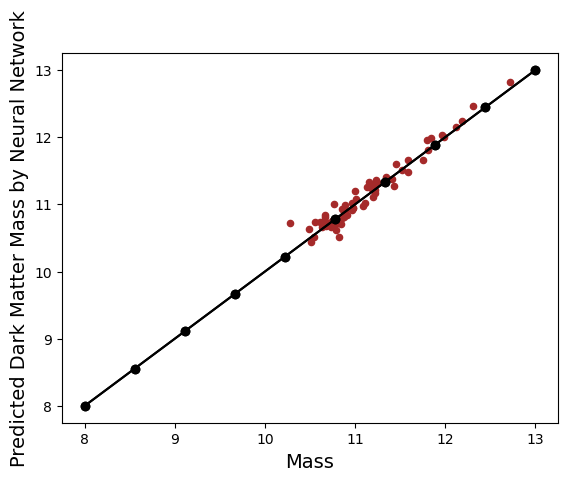

In [32]:
from tensorflow import keras
from tensorflow.keras import layers

NNmodel = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(features.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

NNmodel.compile(optimizer='adam', loss='mean_squared_error')
NN = NNmodel.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=50, batch_size=32)

NNy_pred = NNmodel.predict(X_test)
print("Prediction:", NNy_pred)

NNr2 = r2_score(Y_test, NNy_pred)
print("R2 Score:", NNr2)

NNmse = mean_squared_error(Y_test, NNy_pred)
print("Mean Square Value:", NNmse)

NNC_coeff, NNP_value = stats.pearsonr(NNy_pred.reshape((76,)), Y_test)
print("Pearson Correlation Coefficient:", NNC_coeff)
print("P-value:", NNP_value)

m = np.linspace(8, 13, 10)
n = m
plt.plot(m, n, color='black', linestyle='-', marker='o')

plt.scatter(Y_test, NNy_pred, s=20, c='brown')
plt.plot(m, m, color='black', linestyle='-', marker='o')
plt.xlabel('Mass', fontsize=14)
plt.ylabel('Predicted Dark Matter Mass by Neural Network', fontsize=14)

loss = NNmodel.evaluate(X_test, Y_test)
print("Neural Network nnmodel Loss:", loss)


Model Comparisons

 Model Comparisons for Case 1 


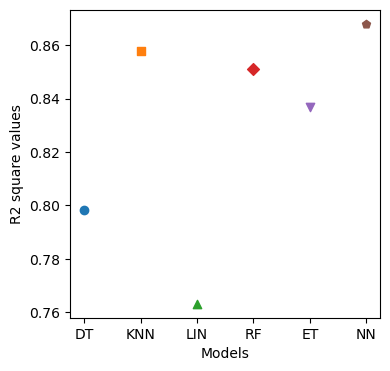

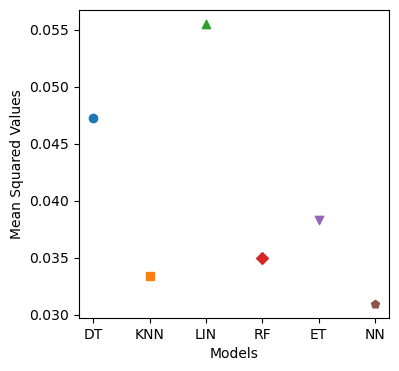

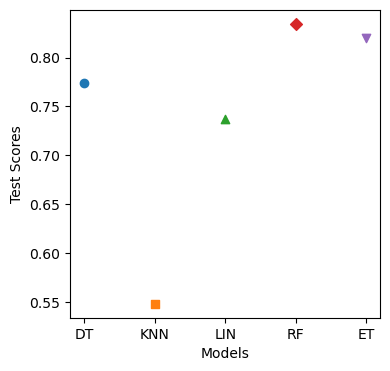

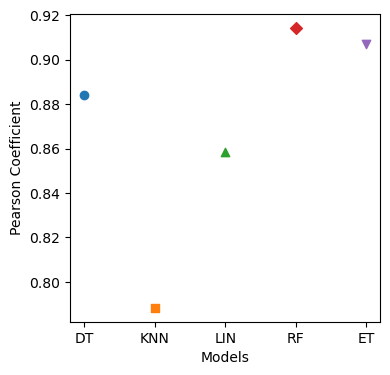

In [33]:
#COMPARISON GRAPH (CASE 1)

print ("\033[1m Model Comparisons for Case 1 \033[0m")

#R square

plt.figure(figsize=(4, 4))
k = [r, kr, lr, fr, etr, nnr2]
b = ['DT', 'KNN', 'LIN', 'RF', 'ET', 'NN']
shapes = ['o', 's', '^', 'D', 'v', 'p']
for i in range(len(k)):
    plt.scatter(b[i], k[i], marker=shapes[i])
plt.xlabel('Models')
plt.ylabel('R2 square values')
plt.show()

#MSE

plt.figure(figsize=(4, 4))
kk = [mse, kmse, lmse, fmse, etmse, nnmse]
bb = ['DT', 'KNN', 'LIN', 'RF', 'ET', 'NN']
shapes = ['o', 's', '^', 'D', 'v', 'p']
for i in range(len(kk)):
    plt.scatter(bb[i], kk[i], marker=shapes[i])
plt.xlabel('Models')
plt.ylabel('Mean Squared Values')
plt.show()

#Test Scores

plt.figure(figsize=(4, 4))
K = [s, ks, ls, fs, ets]
B = ['DT', 'KNN', 'LIN', 'RF', 'ET']
shapes = ['o', 's', '^', 'D', 'v']
for j in range(len(K)):
    plt.scatter(B[j], K[j], marker=shapes[j])
plt.xlabel('Models')
plt.ylabel('Test Scores')
plt.show()

#Pearson Correlation

plt.figure(figsize=(4, 4))
K = [c_coeff, kc_coeff, lc_coeff, fc_coeff, etc_coeff]
B = ['DT', 'KNN', 'LIN', 'RF', 'ET']
shapes = ['o', 's', '^', 'D', 'v']
for j in range(len(K)):
    plt.scatter(B[j], K[j], marker=shapes[j])
plt.xlabel('Models')
plt.ylabel('Pearson Coefficient')
plt.show()

 Model Comparisons for Case 2 


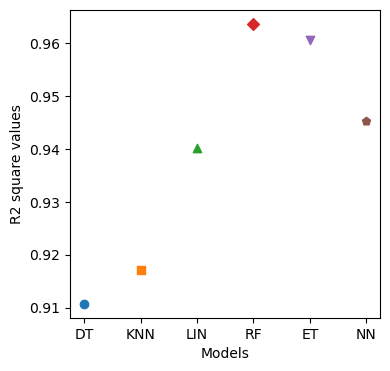

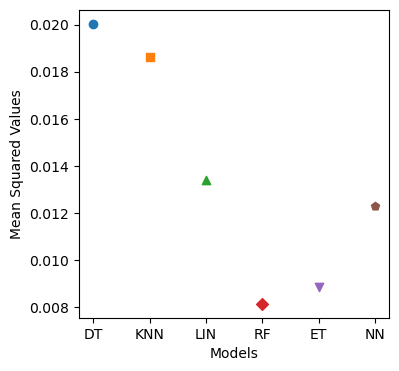

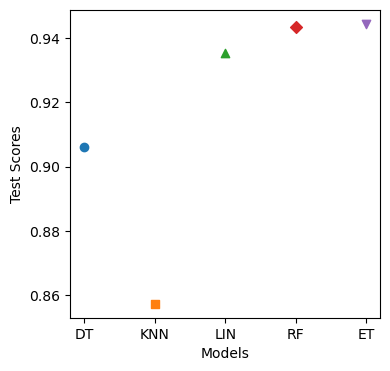

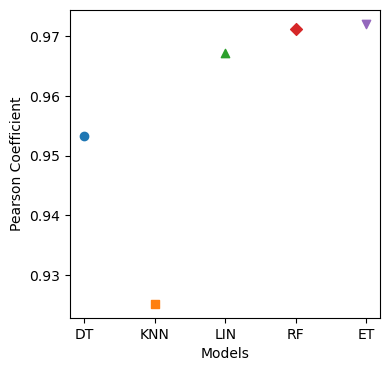

In [34]:
#COMPARISON GRAPH (CASE 2)

print ("\033[1m Model Comparisons for Case 2 \033[0m")

#R square
plt.figure(figsize=(4, 4))
g = [R, KR, LR, FOR, ETR, NNr2]
h = ['DT', 'KNN', 'LIN', 'RF', 'ET', 'NN']
shapes = ['o', 's', '^', 'D', 'v', 'p']
for i in range(len(g)):
    plt.scatter(h[i], g[i], marker=shapes[i])
plt.xlabel('Models')
plt.ylabel('R2 square values')
plt.show()

#Mean Squared Error

plt.figure(figsize=(4, 4))
gg = [Mse, KMse, LMse, FOMse, ETMse, NNmse]
hh = ['DT', 'KNN', 'LIN', 'RF', 'ET', 'NN']
shapes = ['o', 's', '^', 'D', 'v', 'p']
for i in range(len(gg)):
    plt.scatter(hh[i], gg[i], marker=shapes[i])
plt.xlabel('Models')
plt.ylabel('Mean Squared Values')
plt.show()

#Test Scores

plt.figure(figsize=(4, 4))
G = [S, KS, LS, FOS, ETS]
H = ['DT', 'KNN', 'LIN', 'RF', 'ET']
shapes = ['o', 's', '^', 'D', 'v']
for j in range(len(G)):
    plt.scatter(H[j], G[j], marker=shapes[j])
plt.xlabel('Models')
plt.ylabel('Test Scores')
plt.show()

#Pearson Correlation

plt.figure(figsize=(4, 4))
G = [C_coeff, KC_coeff, LC_coeff, FC_coeff, ETC_coeff]
H = ['DT', 'KNN', 'LIN', 'RF', 'ET']
shapes = ['o', 's', '^', 'D', 'v']
for j in range(len(G)):
    plt.scatter(H[j], G[j], marker=shapes[j])
plt.xlabel('Models')
plt.ylabel('Pearson Coefficient')
plt.show()